### SVC案例：预测明天是否会下雨

In [1]:
#导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#导入数据
df = pd.read_csv('weather.csv',index_col=0)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [3]:
df.shape

(142193, 22)

In [4]:
#抽取5000条样本进行后续处理
weather = df.sample(n=5000,random_state=0)

In [5]:
weather.shape

(5000, 22)

In [6]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
86232,2012-10-09,Cairns,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,...,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,No
57576,2011-05-24,Bendigo,6.8,14.4,0.8,0.8,NaN,S,46.0,SW,...,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,No
124071,2009-08-06,Walpole,10.1,15.4,14.6,NaN,NaN,WSW,31.0,SW,...,9.0,70.0,61.0,1014.4,1016.1,NaN,NaN,12.3,13.0,No
117955,2009-03-06,Perth,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,...,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,No
133468,2010-07-02,AliceSprings,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,...,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,No


In [7]:
weather.index = range(weather.shape[0]) #重置索引
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2012-10-09,Cairns,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,...,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,No
1,2011-05-24,Bendigo,6.8,14.4,0.8,0.8,NaN,S,46.0,SW,...,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,No
2,2009-08-06,Walpole,10.1,15.4,14.6,NaN,NaN,WSW,31.0,SW,...,9.0,70.0,61.0,1014.4,1016.1,NaN,NaN,12.3,13.0,No
3,2009-03-06,Perth,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,...,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,No
4,2010-07-02,AliceSprings,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,...,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,No


In [8]:
weather.columns #提取所有的特征名

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [9]:
weather.Date.value_counts() 

2009-08-23    9
2009-07-02    7
2015-08-20    7
2015-11-06    7
2013-07-06    7
2013-05-03    6
2015-10-26    6
2015-10-10    6
2012-06-17    6
2010-02-28    6
2014-01-04    6
2009-02-22    6
2017-05-29    6
2015-02-09    6
2016-08-27    6
2016-03-09    6
2010-12-28    5
2012-06-02    5
2009-11-29    5
2011-06-12    5
2009-08-14    5
2010-12-09    5
2013-08-22    5
2012-09-15    5
2011-11-29    5
2015-02-06    5
2016-07-14    5
2016-08-04    5
2017-05-25    5
2013-12-23    5
             ..
2013-12-12    1
2012-09-29    1
2013-08-28    1
2009-11-15    1
2017-05-08    1
2010-12-12    1
2010-11-15    1
2013-03-29    1
2011-06-09    1
2011-03-10    1
2016-05-24    1
2009-04-20    1
2014-08-14    1
2016-12-30    1
2015-05-21    1
2009-12-31    1
2009-12-04    1
2016-01-04    1
2008-06-19    1
2012-02-22    1
2013-11-19    1
2011-10-07    1
2012-06-01    1
2009-07-07    1
2013-07-13    1
2011-07-08    1
2017-04-23    1
2012-01-19    1
2013-04-06    1
2009-06-27    1
Name: Date, Length: 2486

In [10]:
weather.Location.value_counts()

Newcastle           133
Sydney              125
PerthAirport        125
Darwin              124
Hobart              122
NorahHead           122
Brisbane            121
Perth               121
Adelaide            117
SalmonGums          117
Launceston          116
MountGinini         112
Wollongong          112
PearceRAAF          112
Albany              111
Cairns              109
Canberra            108
Watsonia            108
Albury              107
Ballarat            107
Cobar               107
CoffsHarbour        106
BadgerysCreek       106
Nuriootpa           106
MelbourneAirport    105
Richmond            105
NorfolkIsland       105
Moree               103
AliceSprings        102
SydneyAirport       101
GoldCoast           100
Walpole             100
Witchcliffe          98
Townsville           97
Tuggeranong          97
MountGambier         97
Bendigo              97
Sale                 95
Mildura              94
Penrith              94
Williamtown          91
Portland        

In [11]:
weather.Rainfall.value_counts()

0.0     3167
0.2      309
0.4      124
1.0       81
0.6       79
0.8       67
1.4       65
1.2       54
1.8       44
1.6       37
2.2       35
2.6       34
2.4       31
2.0       30
3.0       28
3.6       26
2.8       25
3.2       23
4.0       20
4.2       17
3.8       17
4.8       15
3.4       15
4.6       15
8.0       13
6.0       13
7.8       12
5.6       12
4.4       12
10.0      11
        ... 
21.8       1
6.4        1
43.2       1
45.0       1
21.2       1
74.8       1
25.2       1
58.2       1
20.4       1
27.4       1
14.2       1
32.2       1
23.6       1
46.8       1
73.2       1
53.6       1
19.0       1
29.8       1
57.6       1
11.6       1
53.8       1
24.6       1
19.6       1
38.8       1
38.0       1
33.0       1
8.5        1
27.0       1
42.0       1
54.2       1
Name: Rainfall, Length: 198, dtype: int64

In [12]:
weather.Cloud9am.value_counts()

7.0    686
1.0    538
8.0    488
0.0    307
6.0    273
2.0    239
5.0    220
3.0    209
4.0    163
Name: Cloud9am, dtype: int64

In [13]:
#查看整体信息
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Date             5000 non-null object
Location         5000 non-null object
MinTemp          4968 non-null float64
MaxTemp          4986 non-null float64
Rainfall         4937 non-null float64
Evaporation      2813 non-null float64
Sunshine         2592 non-null float64
WindGustDir      4640 non-null object
WindGustSpeed    4642 non-null float64
WindDir9am       4650 non-null object
WindDir3pm       4854 non-null object
WindSpeed9am     4951 non-null float64
WindSpeed3pm     4896 non-null float64
Humidity9am      4947 non-null float64
Humidity3pm      4869 non-null float64
Pressure9am      4459 non-null float64
Pressure3pm      4458 non-null float64
Cloud9am         3123 non-null float64
Cloud3pm         2989 non-null float64
Temp9am          4974 non-null float64
Temp3pm          4895 non-null float64
RainTomorrow     5000 non-null object
dtypes: float64(16), object(6)
memory usa

In [14]:
#分别提取特征矩阵和标签
X = weather.iloc[:,:-1]
Y = weather.iloc[:,-1]

In [15]:
X.shape

(5000, 21)

In [16]:
X.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2012-10-09,Cairns,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,...,11.0,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8
1,2011-05-24,Bendigo,6.8,14.4,0.8,0.8,NaN,S,46.0,SW,...,17.0,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7
2,2009-08-06,Walpole,10.1,15.4,14.6,NaN,NaN,WSW,31.0,SW,...,13.0,9.0,70.0,61.0,1014.4,1016.1,NaN,NaN,12.3,13.0
3,2009-03-06,Perth,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,...,9.0,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3
4,2010-07-02,AliceSprings,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,...,15.0,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7


In [17]:
#查看标签类别
np.unique(Y)

array(['No', 'Yes'], dtype=object)

In [18]:
#查看缺失值的比例（各个特征的缺失值比例）
X.isnull().mean()

Date             0.0000
Location         0.0000
MinTemp          0.0064
MaxTemp          0.0028
Rainfall         0.0126
Evaporation      0.4374
Sunshine         0.4816
WindGustDir      0.0720
WindGustSpeed    0.0716
WindDir9am       0.0700
WindDir3pm       0.0292
WindSpeed9am     0.0098
WindSpeed3pm     0.0208
Humidity9am      0.0106
Humidity3pm      0.0262
Pressure9am      0.1082
Pressure3pm      0.1084
Cloud9am         0.3754
Cloud3pm         0.4022
Temp9am          0.0052
Temp3pm          0.0210
dtype: float64

In [19]:
#切分训练集和测试集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)

In [20]:
Xtrain.shape

(3500, 21)

In [21]:
Xtest.shape

(1500, 21)

In [22]:
#恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [23]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
2,2017-06-14,GoldCoast,16.3,20.6,17.8,NaN,NaN,SE,72.0,S,...,37.0,52.0,100.0,100.0,1023.3,1022.7,NaN,NaN,18.1,20.0
3,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
4,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2


In [24]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-07-16,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,2.0,7.0,94.0,54.0,NaN,NaN,NaN,NaN,1.9,10.6
1,2015-04-28,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,NaN,...,0.0,9.0,68.0,46.0,1030.8,1028.4,NaN,NaN,14.1,16.0
2,2015-03-21,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,9.0,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4
3,2009-02-22,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,17.0,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5
4,2017-02-20,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,15.0,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8


In [25]:
#查看标签是否存在样本不均衡问题
Ytrain.value_counts()

No     2710
Yes     790
Name: RainTomorrow, dtype: int64

In [26]:
Ytest.value_counts()

No     1137
Yes     363
Name: RainTomorrow, dtype: int64

In [27]:
#对标签进行编码
from sklearn.preprocessing import LabelEncoder #标签专用编码包
from sklearn.preprocessing import OrdinalEncoder #特征专用包

In [28]:
encorder = LabelEncoder().fit(Ytrain) #模型中相当于是[0,1]

In [29]:
encorder.classes_ 

array(['No', 'Yes'], dtype=object)

In [30]:
encorder.transform(Ytrain)

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
encorder.transform(Ytest)

array([0, 0, 0, ..., 0, 0, 1])

In [32]:
#关于fit/transform/fit_transform
#fit完之后得到模型，如果想要把模型运用到不同的对象上，那就fit 和 transform分开
#如果想要把fit之后的模型运用到同一个对象上，可以直接写fit_transform

In [33]:
Ytrain = pd.DataFrame(encorder.transform(Ytrain))
Ytest = pd.DataFrame(encorder.transform(Ytest))

In [34]:
Ytrain.head(2)

,0
0,0
1,0


In [35]:
Ytest.head(2)

,0
0,0
1,0


### 处理特征矩阵

In [36]:
#描述性统计
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3477.0,12.340236,6.384294,-6.9,-2.024,2.1,4.3,7.700,12.1,17.0,20.9,25.824,29.1
MaxTemp,3492.0,23.232904,6.992256,-4.1,8.900,12.7,14.6,18.200,22.7,28.1,32.8,39.600,43.7
Rainfall,3460.0,2.106618,6.570495,0.0,0.000,0.0,0.0,0.000,0.0,0.8,6.0,35.400,102.0
Evaporation,1986.0,5.398489,3.837948,0.0,0.400,1.0,1.4,2.725,4.8,7.4,9.8,17.430,52.4
Sunshine,1835.0,7.723869,3.691531,0.0,0.000,0.4,2.0,5.100,8.5,10.6,12.0,13.400,14.3
WindGustSpeed,3254.0,39.878611,13.492322,9.0,15.000,20.0,24.0,31.000,39.0,46.0,57.0,81.000,115.0
WindSpeed9am,3470.0,13.924784,8.861956,0.0,0.000,0.0,4.0,7.000,13.0,19.0,26.0,39.000,52.0
WindSpeed3pm,3426.0,18.765032,8.915825,0.0,2.000,6.0,7.0,13.000,19.0,24.0,30.0,43.000,78.0
Humidity9am,3460.0,68.844509,18.918369,5.0,18.000,35.0,44.0,57.000,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3405.0,51.628781,20.705426,1.0,9.000,17.0,24.0,37.000,52.0,65.0,79.6,97.960,100.0


In [37]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1491.0,12.211335,6.458887,-6.3,-2.500,1.50,3.90,7.6,12.2,16.800,20.70,25.610,28.5
MaxTemp,1494.0,23.330857,7.380122,-0.6,7.686,12.60,14.40,18.0,22.7,28.775,33.50,40.500,44.4
Rainfall,1477.0,2.338456,8.114066,0.0,0.000,0.00,0.00,0.0,0.0,0.800,6.20,31.632,164.2
Evaporation,827.0,5.492745,4.007532,0.0,0.200,0.80,1.40,2.6,4.8,7.600,10.40,16.000,58.5
Sunshine,757.0,7.756803,3.815881,0.0,0.000,0.48,1.66,4.9,8.6,10.700,12.30,13.400,14.0
WindGustSpeed,1388.0,40.164986,14.144410,11.0,15.000,20.00,24.00,30.0,39.0,48.000,57.00,87.000,102.0
WindSpeed9am,1481.0,14.135719,9.018514,0.0,0.000,0.00,4.00,7.0,13.0,19.000,26.00,37.400,72.0
WindSpeed3pm,1470.0,18.759184,9.002335,0.0,2.000,6.00,8.80,13.0,19.0,24.000,30.00,44.620,65.0
Humidity9am,1487.0,67.854069,19.342026,8.0,16.860,32.30,42.60,56.0,68.0,83.000,94.00,100.000,100.0
Humidity3pm,1464.0,50.962432,21.100400,4.0,8.000,15.00,23.00,35.0,52.0,65.000,79.00,97.370,100.0


In [38]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
2,2017-06-14,GoldCoast,16.3,20.6,17.8,NaN,NaN,SE,72.0,S,...,37.0,52.0,100.0,100.0,1023.3,1022.7,NaN,NaN,18.1,20.0
3,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
4,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2


In [39]:
Xtrain.mean()

MinTemp            12.340236
MaxTemp            23.232904
Rainfall            2.106618
Evaporation         5.398489
Sunshine            7.723869
WindGustSpeed      39.878611
WindSpeed9am       13.924784
WindSpeed3pm       18.765032
Humidity9am        68.844509
Humidity3pm        51.628781
Pressure9am      1017.538520
Pressure3pm      1015.140542
Cloud9am            4.463624
Cloud3pm            4.540132
Temp9am            17.058115
Temp3pm            21.671979
dtype: float64

In [40]:
#提取出所有的数值型特征的列名
col = Xtrain.mean().index

In [41]:
len(col) #16个数值型的特征

16

In [42]:
col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [43]:
Xtrain.mean() #返回每一列的均值

MinTemp            12.340236
MaxTemp            23.232904
Rainfall            2.106618
Evaporation         5.398489
Sunshine            7.723869
WindGustSpeed      39.878611
WindSpeed9am       13.924784
WindSpeed3pm       18.765032
Humidity9am        68.844509
Humidity3pm        51.628781
Pressure9am      1017.538520
Pressure3pm      1015.140542
Cloud9am            4.463624
Cloud3pm            4.540132
Temp9am            17.058115
Temp3pm            21.671979
dtype: float64

In [44]:
(Xtrain.loc[:,col] - Xtrain.mean())/Xtrain.std()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,1.043148,0.939196,-0.320618,0.573617,-0.033555,-0.880398,-0.104354,0.026354,0.748241,0.307708,-0.160064,-0.233704,0.886672,-0.568889,0.973678,1.098613
1,-1.024426,-1.520669,-0.320618,-0.520718,-0.250267,-0.658049,0.121329,0.026354,NaN,-0.271851,0.205469,0.207907,0.886672,-1.307642,-1.397385,-1.469870
2,0.620235,-0.376546,2.388463,NaN,NaN,2.380716,2.603851,3.727638,1.646838,2.336161,0.810005,1.076884,NaN,NaN,0.162525,-0.244003
3,-0.899118,-1.635081,0.075090,-1.093941,-1.550541,-0.065119,-0.330038,0.138514,1.646838,1.418528,0.627238,0.934429,1.236254,0.908617,-1.397385,-1.484464
4,0.886514,1.625669,-0.320618,NaN,NaN,-0.065119,-1.345615,-0.197966,-0.256074,-0.948002,-1.523785,-1.715237,NaN,-1.307642,1.176466,1.682360
5,0.150332,-0.004706,-0.320618,NaN,NaN,-0.361584,0.347013,-1.095247,-1.366107,-0.899705,NaN,NaN,0.537090,-1.307642,-0.399043,0.106245
6,-0.507532,0.324230,-0.320618,NaN,NaN,-0.361584,-0.894248,-1.656048,1.382545,-0.513333,0.458531,-0.034266,-0.511657,-1.307642,-0.477038,0.514867
7,-0.601513,-1.878207,-0.168422,-0.885497,NaN,0.305462,0.121329,0.138514,1.435403,1.853196,-0.595893,-0.319177,1.236254,1.277994,-1.116601,-1.922273
8,1.419071,1.125116,-0.320618,1.303173,1.239629,-0.658049,-0.781406,-0.197966,-0.308933,0.307708,-1.130134,-1.145417,-0.861239,-1.307642,1.831628,1.273737
9,-0.460542,-0.219229,-0.320618,NaN,NaN,0.750159,0.685539,1.820916,-0.150357,-0.754816,1.400482,1.105375,NaN,NaN,-0.445840,-0.200222


In [45]:
np.abs((Xtrain.loc[:,col] - Xtrain.mean())/Xtrain.std()) #求绝对值

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,1.043148,0.939196,0.320618,0.573617,0.033555,0.880398,0.104354,0.026354,0.748241,0.307708,0.160064,0.233704,0.886672,0.568889,0.973678,1.098613
1,1.024426,1.520669,0.320618,0.520718,0.250267,0.658049,0.121329,0.026354,NaN,0.271851,0.205469,0.207907,0.886672,1.307642,1.397385,1.469870
2,0.620235,0.376546,2.388463,NaN,NaN,2.380716,2.603851,3.727638,1.646838,2.336161,0.810005,1.076884,NaN,NaN,0.162525,0.244003
3,0.899118,1.635081,0.075090,1.093941,1.550541,0.065119,0.330038,0.138514,1.646838,1.418528,0.627238,0.934429,1.236254,0.908617,1.397385,1.484464
4,0.886514,1.625669,0.320618,NaN,NaN,0.065119,1.345615,0.197966,0.256074,0.948002,1.523785,1.715237,NaN,1.307642,1.176466,1.682360
5,0.150332,0.004706,0.320618,NaN,NaN,0.361584,0.347013,1.095247,1.366107,0.899705,NaN,NaN,0.537090,1.307642,0.399043,0.106245
6,0.507532,0.324230,0.320618,NaN,NaN,0.361584,0.894248,1.656048,1.382545,0.513333,0.458531,0.034266,0.511657,1.307642,0.477038,0.514867
7,0.601513,1.878207,0.168422,0.885497,NaN,0.305462,0.121329,0.138514,1.435403,1.853196,0.595893,0.319177,1.236254,1.277994,1.116601,1.922273
8,1.419071,1.125116,0.320618,1.303173,1.239629,0.658049,0.781406,0.197966,0.308933,0.307708,1.130134,1.145417,0.861239,1.307642,1.831628,1.273737
9,0.460542,0.219229,0.320618,NaN,NaN,0.750159,0.685539,1.820916,0.150357,0.754816,1.400482,1.105375,NaN,NaN,0.445840,0.200222


In [46]:
np.abs((Xtrain.loc[:,col] - Xtrain.mean())/Xtrain.std())>3

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
(np.abs((Xtrain.loc[:,col] - Xtrain.mean())/Xtrain.std())>3).sum() #每一列的异常值的数量

MinTemp           1
MaxTemp           8
Rainfall         76
Evaporation      22
Sunshine          0
WindGustSpeed    37
WindSpeed9am     34
WindSpeed3pm     21
Humidity9am      13
Humidity3pm       0
Pressure9am      12
Pressure3pm      10
Cloud9am          0
Cloud3pm          0
Temp9am           4
Temp3pm           9
dtype: int64

In [48]:
#查看训练集各列异常值的比例
(np.abs((Xtrain.loc[:,col] - Xtrain.mean())/Xtrain.std())>3).sum()/Xtrain.shape[0]

MinTemp          0.000286
MaxTemp          0.002286
Rainfall         0.021714
Evaporation      0.006286
Sunshine         0.000000
WindGustSpeed    0.010571
WindSpeed9am     0.009714
WindSpeed3pm     0.006000
Humidity9am      0.003714
Humidity3pm      0.000000
Pressure9am      0.003429
Pressure3pm      0.002857
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.001143
Temp3pm          0.002571
dtype: float64

In [49]:
a = [1,2,4]
a.append([5,6,7])

In [50]:
a

[1, 2, 4, [5, 6, 7]]

In [51]:
b=[1,2,4]
b.extend([1,6,7])
b

[1, 2, 4, 1, 6, 7]

In [52]:
#删除异常值
deltrain = [] 
for i in col:
    bool_ = np.abs((Xtrain.loc[:,i] -Xtrain.loc[:,i].mean())/Xtrain.loc[:,i].std())>3
    ind = Xtrain[bool_].index
    deltrain.extend(list(ind))

In [53]:
len(deltrain)

247

In [54]:
len(set(deltrain))

199

In [55]:
list(set(deltrain))

[2562,
 2,
 1539,
 3085,
 3086,
 2576,
 1042,
 3094,
 2583,
 1049,
 1562,
 1567,
 35,
 1062,
 551,
 41,
 3114,
 1067,
 1069,
 3119,
 1073,
 52,
 2046,
 1591,
 57,
 61,
 3134,
 1086,
 2624,
 2110,
 576,
 2119,
 586,
 590,
 2126,
 2128,
 1617,
 2648,
 2651,
 607,
 3171,
 2665,
 3190,
 1143,
 3192,
 2681,
 121,
 638,
 2686,
 1664,
 1152,
 1666,
 3204,
 2183,
 1162,
 2700,
 3216,
 2706,
 659,
 663,
 2714,
 3229,
 2211,
 1189,
 2728,
 3242,
 1707,
 1194,
 2732,
 1198,
 177,
 2227,
 1716,
 2741,
 2742,
 184,
 698,
 1213,
 3263,
 192,
 706,
 2245,
 1221,
 715,
 3277,
 206,
 1746,
 211,
 3284,
 213,
 214,
 2773,
 2776,
 3289,
 2268,
 3298,
 1250,
 231,
 3308,
 1262,
 3313,
 2802,
 243,
 2289,
 3317,
 1271,
 760,
 254,
 3327,
 1284,
 1800,
 3337,
 1295,
 3346,
 3351,
 3354,
 2842,
 2335,
 800,
 2850,
 803,
 1316,
 294,
 1836,
 1843,
 3386,
 827,
 1339,
 1341,
 3393,
 3394,
 1347,
 837,
 2376,
 3400,
 1866,
 844,
 1869,
 2892,
 3408,
 2384,
 338,
 853,
 2908,
 350,
 1890,
 1379,
 868,
 870,
 871

In [56]:
#去重之后有异常值的行索引
deltrain1 = list(set(deltrain))

In [57]:
#查看测试集各列异常值（注意这里的均值和方差需要用训练集的）
(np.abs((Xtest.loc[:,col] - Xtrain.mean())/Xtrain.std())>3).sum()/Xtest.shape[0]

MinTemp          0.000000
MaxTemp          0.004000
Rainfall         0.024667
Evaporation      0.004667
Sunshine         0.000000
WindGustSpeed    0.013333
WindSpeed9am     0.007333
WindSpeed3pm     0.010000
Humidity9am      0.004667
Humidity3pm      0.000000
Pressure9am      0.004000
Pressure3pm      0.004000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000667
Temp3pm          0.005333
dtype: float64

In [58]:
#提取出测试集的所有异常值的索引
deltest = []
for i in col:
    bool_ = np.abs((Xtest.loc[:,i] - Xtrain.loc[:,i].mean())/Xtrain.loc[:,i].std())>3
    ind = Xtest[bool_].index
    deltest.extend(list(ind))

In [59]:
len(deltest)

124

In [60]:
len(set(deltest))

90

In [61]:
#去重之后有异常值的行索引
deltest1 = list(set(deltest))

In [62]:
#删除异常值（特征和标签都要删除）
Xtrain = Xtrain.drop(index=deltrain1)
Ytrain = Ytrain.drop(index=deltrain1)
Xtest = Xtest.drop(index=deltest1)
Ytest = Ytest.drop(index=deltest1)

In [63]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
3,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
4,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2
5,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,17.0,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4


In [64]:
Xtrain.shape #删除了199条数据

(3301, 21)

In [65]:
Xtest.shape #删除了90个数据

(1410, 21)

In [66]:
#进行任何行删除之后，千万记得要恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [67]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
2,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
3,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2
4,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,17.0,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4


In [68]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-07-16,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,2.0,7.0,94.0,54.0,NaN,NaN,NaN,NaN,1.9,10.6
1,2015-04-28,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,NaN,...,0.0,9.0,68.0,46.0,1030.8,1028.4,NaN,NaN,14.1,16.0
2,2015-03-21,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,9.0,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4
3,2009-02-22,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,17.0,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5
4,2017-02-20,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,15.0,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8


In [69]:
Ytrain.shape

(3301, 1)

In [70]:
Ytest.shape

(1410, 1)

### 处理困难特征：日期

In [71]:
Xtrain.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6


In [72]:
Xtrain.Date.value_counts()

2009-08-23    6
2015-11-06    6
2015-01-18    5
2009-08-14    5
2015-02-06    5
2015-07-13    5
2013-08-22    5
2011-09-11    5
2015-02-09    5
2016-02-21    5
2015-10-10    5
2009-02-22    5
2009-11-29    5
2011-10-22    4
2016-03-09    4
2010-01-31    4
2010-04-25    4
2010-09-15    4
2010-06-11    4
2014-12-22    4
2010-06-27    4
2009-01-05    4
2011-01-24    4
2011-07-21    4
2014-09-05    4
2013-09-09    4
2012-06-17    4
2009-03-13    4
2015-10-26    4
2011-05-23    4
             ..
2016-06-21    1
2014-09-17    1
2014-06-26    1
2013-12-24    1
2015-06-19    1
2013-07-28    1
2012-03-19    1
2013-07-11    1
2014-12-25    1
2008-12-18    1
2013-08-28    1
2013-09-29    1
2017-02-02    1
2013-08-21    1
2012-03-21    1
2013-01-08    1
2011-10-31    1
2016-10-21    1
2010-08-15    1
2015-04-14    1
2014-08-27    1
2015-07-24    1
2013-07-25    1
2013-05-29    1
2012-08-02    1
2009-11-28    1
2009-05-02    1
2008-09-28    1
2010-07-06    1
2011-10-21    1
Name: Date, Length: 2025

In [73]:
#找出2015-11-06
sum(Xtrain.Date == '2015-11-06')

6

In [74]:
Xtrain[Xtrain.Date == '2015-11-06']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
138,2015-11-06,MountGambier,12.4,16.5,1.6,1.8,3.7,WSW,39.0,SW,...,17.0,26.0,96.0,64.0,1013.3,1014.2,8.0,7.0,12.6,15.0
1204,2015-11-06,CoffsHarbour,20.1,28.3,7.2,NaN,NaN,NE,46.0,NNE,...,17.0,31.0,81.0,66.0,1010.9,1006.4,NaN,NaN,23.3,25.6
1854,2015-11-06,Ballarat,12.6,15.0,1.4,NaN,NaN,WSW,35.0,SW,...,17.0,22.0,100.0,99.0,1010.2,1010.9,7.0,8.0,12.8,14.8
2332,2015-11-06,MountGinini,7.5,10.8,16.0,NaN,NaN,W,43.0,W,...,15.0,11.0,97.0,97.0,NaN,NaN,NaN,NaN,8.5,9.7
2732,2015-11-06,Newcastle,17.7,30.0,2.0,NaN,NaN,NaN,NaN,N,...,9.0,NaN,75.0,NaN,NaN,NaN,5.0,NaN,24.0,NaN
2911,2015-11-06,Launceston,15.8,26.2,5.0,NaN,NaN,NNW,35.0,NNW,...,4.0,20.0,88.0,66.0,NaN,NaN,7.0,8.0,17.9,24.1


In [75]:
#查看重复值
Xtrain.duplicated().sum()
# 删除重复值用.drop_duplicates()

0

In [76]:
#查看日期的种类方法一
Xtrain.Date.value_counts().count()

2025

In [77]:
#查看日期的种类方法二
len(set(Xtrain.Date))

2025

In [78]:
Xtrain.Rainfall.value_counts()

0.0     2157
0.2      209
0.4       90
1.0       54
0.6       48
0.8       45
1.4       43
1.2       35
1.8       31
1.6       28
2.2       21
2.0       21
2.4       21
2.6       21
3.6       20
3.0       19
3.2       15
2.8       15
3.8       13
6.0       12
4.0       11
4.8       10
3.4       10
4.6        9
4.2        9
9.8        9
5.8        8
7.2        8
5.6        8
11.8       7
        ... 
8.2        2
21.6       2
21.0       2
17.4       2
20.0       2
19.8       1
0.3        1
21.2       1
1.1        1
19.0       1
15.4       1
18.4       1
19.2       1
2.3        1
21.8       1
19.6       1
5.5        1
18.0       1
14.0       1
8.5        1
15.8       1
6.9        1
11.6       1
18.6       1
13.6       1
14.2       1
16.4       1
18.8       1
19.4       1
17.8       1
Name: Rainfall, Length: 113, dtype: int64

In [79]:
Xtrain["Rainfall"].head(20)

0     0.0
1     0.0
2     2.6
3     0.0
4     0.0
5     0.0
6     1.0
7     0.0
8     0.0
9     0.0
10    1.4
11    0.0
12    0.0
13    0.0
14    0.2
15    0.0
16    0.0
17    1.2
18    0.0
19    0.0
Name: Rainfall, dtype: float64

In [80]:
#查看Rainfall列是否存在缺失值
Xtrain.Rainfall.isnull().sum() 

38

In [81]:
Xtrain.loc[Xtrain["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtrain.loc[Xtrain["Rainfall"] < 1,"RainToday"] = "No"
Xtrain.loc[Xtrain["Rainfall"] == np.nan,"RainToday"] = np.nan

In [82]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2,No
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6,No
2,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5,Yes
3,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2,No
4,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4,No


In [83]:
Xtrain['RainToday'].value_counts()

No     2555
Yes     708
Name: RainToday, dtype: int64

In [84]:
Xtrain.shape

(3301, 22)

In [85]:
Xtest.loc[Xtest["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtest.loc[Xtest["Rainfall"] < 1,"RainToday"] = "No"
Xtest.loc[Xtest["Rainfall"] == np.nan,"RainToday"] = np.nan

In [86]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2015-07-16,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,7.0,94.0,54.0,NaN,NaN,NaN,NaN,1.9,10.6,No
1,2015-04-28,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,NaN,...,9.0,68.0,46.0,1030.8,1028.4,NaN,NaN,14.1,16.0,No
2,2015-03-21,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4,No
3,2009-02-22,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5,No
4,2017-02-20,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8,Yes


In [87]:
#提取月份
int(Xtrain.loc[0,'Date'].split('-')[1])

3

In [88]:
Xtrain["Date"] = Xtrain["Date"].apply(lambda x:int(x.split("-")[1]))
#apply指的是循环

In [89]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2,No
1,9,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6,No
2,7,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5,Yes
3,1,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2,No
4,2,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4,No


In [90]:
Xtrain.rename(columns={"Date":"Month"},inplace=True)

In [91]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2,No
1,9,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6,No
2,7,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5,Yes
3,1,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2,No
4,2,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4,No


In [92]:
Xtest["Date"] = Xtest["Date"].apply(lambda x:int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date":"Month"})

### 处理分类型变量的缺失值

In [93]:
#查看缺失值的缺失情况
Xtrain.isnull().mean()

Month            0.000000
Location         0.000000
MinTemp          0.006968
MaxTemp          0.002121
Rainfall         0.011512
Evaporation      0.432899
Sunshine         0.475613
WindGustDir      0.069979
WindGustSpeed    0.069676
WindDir9am       0.073614
WindDir3pm       0.029991
WindSpeed9am     0.008482
WindSpeed3pm     0.021509
Humidity9am      0.010906
Humidity3pm      0.027264
Pressure9am      0.102999
Pressure3pm      0.103302
Cloud9am         0.369888
Cloud3pm         0.396547
Temp9am          0.004847
Temp3pm          0.021206
RainToday        0.011512
dtype: float64

In [94]:
Xtrain.dtypes #提取每一列的数据类型

Month              int64
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

In [95]:
#找出分类型变量的特征名
cate = Xtrain.columns[Xtrain.dtypes =='object'].tolist()
cate

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [96]:
#除了特征类型为"object"的特征们，还有虽然用数字表示，但是本质为分类型特征的云层遮蔽程度
cloud = ["Cloud9am","Cloud3pm"]

In [97]:
cate = cate + cloud
cate

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [98]:
#对于分类型特征，我们使用众数来进行填补
from sklearn.impute import SimpleImputer

In [99]:
si = SimpleImputer(missing_values=np.nan,strategy="most_frequent") #实例化模型

In [100]:
Xtrain.loc[:,cate]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,Williamtown,SE,NW,SE,No,7.0,3.0
1,Hobart,ESE,N,SE,No,7.0,1.0
2,Watsonia,S,SW,SSW,Yes,8.0,7.0
3,Uluru,SW,E,SW,No,NaN,1.0
4,Launceston,NNW,SSE,N,No,6.0,1.0
5,Richmond,SE,ENE,E,No,3.0,1.0
6,Cobar,SW,SSW,SW,Yes,8.0,8.0
7,Cairns,NNE,E,NNE,No,2.0,1.0
8,Ballarat,N,NNE,N,No,NaN,NaN
9,Launceston,NNW,NNW,NNW,No,8.0,8.0


In [101]:
si = si.fit(Xtrain.loc[:,cate]) #这里本质上是生成了每一列的众数

In [102]:
si

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [103]:
#然后我们用训练集中的众数来同时填补训练集和测试集
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])

In [104]:
#确认训练集中是否还有缺失值
Xtrain.loc[:,cate].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
Cloud9am       0
Cloud3pm       0
dtype: int64

In [105]:
#确认测试集中是否还有缺失值
Xtest.loc[:,cate].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
Cloud9am       0
Cloud3pm       0
dtype: int64

### 将分类型变量进行编码

In [106]:
#将所有的分类型变量编码为数字，一个类别是一个数字
from sklearn.preprocessing import OrdinalEncoder #特征专用编码包（输入必须为二维及以上）
oe = OrdinalEncoder() #实例化

In [107]:
#利用训练集进行fit
oe = oe.fit(Xtrain.loc[:,cate]) #相当于把每一列编码，并记录对应关系

In [108]:
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

In [109]:
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7,17.0,-0.6,10.8,0.0,NaN,NaN,9.0,20.0,0.0,...,7.0,94.0,54.0,NaN,NaN,7.0,7.0,1.9,10.6,0.0
1,4,0.0,8.7,16.7,0.0,1.6,NaN,9.0,22.0,3.0,...,9.0,68.0,46.0,1030.8,1028.4,7.0,7.0,14.1,16.0,0.0
2,3,33.0,7.7,19.0,0.0,5.4,10.3,0.0,33.0,9.0,...,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4,0.0
3,2,33.0,14.8,21.7,0.0,2.2,12.5,2.0,33.0,2.0,...,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5,0.0
4,2,33.0,10.8,18.2,2.0,NaN,NaN,11.0,37.0,12.0,...,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8,1.0


In [110]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3,45.0,19.0,29.8,0.0,7.6,7.6,9.0,28.0,7.0,...,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2,0.0
1,9,15.0,5.8,12.6,0.0,3.4,6.8,2.0,31.0,3.0,...,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6,0.0
2,7,44.0,6.6,11.8,2.6,1.2,2.0,8.0,39.0,12.0,...,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5,1.0
3,1,41.0,18.0,34.6,0.0,NaN,NaN,12.0,39.0,0.0,...,17.0,64.0,32.0,1006.7,1003.1,7.0,1.0,24.6,33.2,0.0
4,2,17.0,13.3,23.2,0.0,NaN,NaN,6.0,35.0,10.0,...,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4,0.0


### 处理连续型变量：填补缺失值

In [111]:
#提取连续型特征的名字
col = Xtrain.columns.tolist()

In [112]:
col

['Month',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [113]:
for i in cate:
    col.remove(i)

In [114]:
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [115]:
#实例化模型，填补策略为"mean"表示均值
impmean = SimpleImputer(missing_values=np.nan,strategy = "mean")

In [116]:
#用训练集来fit模型
impmean = impmean.fit(Xtrain.loc[:,col]) #相当于计算出每一列的均值

In [117]:
#分别在训练集和测试集上进行均值填补
Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col])

In [118]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3.0,45.0,19.0,29.8,0.0,7.600000,7.600000,9.0,28.0,7.0,...,19.0,83.000000,58.0,1016.400000,1013.50,7.0,3.0,23.3,29.2,0.0
1,9.0,15.0,5.8,12.6,0.0,3.400000,6.800000,2.0,31.0,3.0,...,19.0,68.771516,46.0,1019.000000,1016.60,7.0,1.0,8.1,11.6,0.0
2,7.0,44.0,6.6,11.8,2.6,1.200000,2.000000,8.0,39.0,12.0,...,20.0,100.000000,81.0,1022.000000,1021.70,8.0,7.0,8.1,11.5,1.0
3,1.0,41.0,18.0,34.6,0.0,5.173344,7.826516,12.0,39.0,0.0,...,17.0,64.000000,32.0,1006.700000,1003.10,7.0,1.0,24.6,33.2,0.0
4,2.0,17.0,13.3,23.2,0.0,5.173344,7.826516,6.0,35.0,10.0,...,9.0,43.000000,33.0,1017.898109,1015.46,6.0,1.0,14.5,22.4,0.0


In [119]:
#确认训练集中是否还有缺失值
Xtrain.isnull().sum()

Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [120]:
#确认测试集中是否还有缺失值
Xtest.isnull().sum()

Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

### 处理量纲问题

In [121]:
#查看是否存在量纲不统一问题
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,3301.0,6.360497,3.431097,1.0,3.000000,6.000000,9.0,12.0
Location,3301.0,23.456831,14.057405,0.0,11.000000,23.000000,35.0,48.0
MinTemp,3301.0,12.254912,6.291149,-5.3,7.700000,12.000000,16.8,29.1
MaxTemp,3301.0,23.285641,6.788046,3.4,18.300000,22.800000,28.1,42.9
Rainfall,3301.0,1.299081,3.327557,0.0,0.000000,0.000000,0.6,21.8
Evaporation,3301.0,5.173344,2.381357,0.0,4.200000,5.173344,5.2,16.6
Sunshine,3301.0,7.826516,2.627575,0.0,7.826516,7.826516,8.9,14.3
WindGustDir,3301.0,7.771584,4.520786,0.0,4.000000,9.000000,11.0,15.0
WindGustSpeed,3301.0,38.749267,11.634887,9.0,31.000000,38.749267,44.0,80.0
WindDir9am,3301.0,6.932445,4.501917,0.0,3.000000,7.000000,11.0,15.0


In [122]:
col.remove('Month')

In [123]:
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [124]:
#对连续型变量进行数据标准化
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() #实例化
ss = ss.fit(Xtrain.loc[:,col]) #相当于生成每一列的均值和标准差
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])

In [125]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3.0,45.0,1.072318,0.959826,-0.390460,1.019177,-8.622049e-02,9.0,-0.924022,7.0,...,0.084288,0.775155,0.348282,-2.323437e-01,-3.062943e-01,7.0,3.0,0.995825,1.134599,0.0
1,9.0,15.0,-1.026186,-1.574423,-0.390460,-0.744791,-3.907299e-01,2.0,-0.666138,3.0,...,0.084288,0.000000,-0.260446,1.708938e-01,1.781508e-01,7.0,1.0,-1.415539,-1.543087,0.0
2,7.0,44.0,-0.899004,-1.692296,0.391013,-1.668774,-2.217786e+00,8.0,0.021553,12.0,...,0.205503,1.701299,1.515011,6.361679e-01,9.751411e-01,8.0,7.0,-1.415539,-1.558301,1.0
3,1.0,41.0,0.913340,1.667059,-0.390460,0.000000,-6.761467e-16,12.0,0.021553,0.0,...,-0.158143,-0.259948,-0.970628,-1.736730e+00,-1.931530e+00,7.0,1.0,1.202060,1.743163,0.0
4,2.0,17.0,0.166146,-0.012618,-0.390460,0.000000,-6.761467e-16,6.0,-0.322292,10.0,...,-1.127866,-1.404009,-0.919901,-1.763185e-14,-1.776614e-14,6.0,1.0,-0.400228,0.100038,0.0


In [126]:
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7.0,17.0,-2.043643,-1.839636,-0.390460,0.000000,-6.761467e-16,9.0,-1.611714,0.0,...,-1.370297,1.374425,0.145373,-1.763185e-14,-1.776614e-14,7.0,7.0,-2.399122,-1.695228,0.0
1,4.0,0.0,-0.565151,-0.970329,-0.390460,-1.500777,-6.761467e-16,9.0,-1.439791,3.0,...,-1.127866,-0.042031,-0.260446,2.000972e+00,2.022168e+00,7.0,7.0,-0.463685,-0.873665,0.0
2,3.0,33.0,-0.724129,-0.631447,-0.390460,0.095194,9.414987e-01,0.0,-0.494215,9.0,...,-0.400574,-0.368906,-0.057536,1.520189e+00,1.647113e+00,8.0,1.0,-0.495413,-0.508526,0.0
3,2.0,33.0,0.404612,-0.233628,-0.390460,-1.248782,1.778900e+00,2.0,-0.494215,2.0,...,0.084288,-0.423385,-0.209718,9.334813e-02,-4.063088e-02,6.0,3.0,-0.178129,-0.036889,0.0
4,2.0,33.0,-0.231298,-0.749319,0.210673,0.000000,-6.761467e-16,11.0,-0.150370,12.0,...,0.447934,0.284843,0.196100,-3.253985e-01,1.937780e-01,7.0,8.0,-0.622327,-0.751952,1.0


In [127]:
#建议大家把处理干净的数据保存下来
# Xtrain.to_csv('weather_Xtrain.csv',encoding='utf-8')

In [128]:
# Xtest.to_csv('weather_Xtest.csv',encoding='utf-8')

In [129]:
# Ytrain.to_csv('weather_Ytrain.csv',encoding = 'utf-8')

In [130]:
# Ytest.to_csv('weather_Ytest.csv',encoding = 'utf-8')

### 建立模型及模型评估

In [131]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [150]:
Ytrain = pd.read_csv('weather_Ytrain.csv',index_col=0)
Ytest =pd.read_csv('weather_Ytest.csv',index_col=0)

In [151]:
#查看标签
Ytrain.head(2)

,0
0,0
1,0


In [152]:
Ytest.head(2)

,0
0,0
1,0


In [154]:
#对标签进行转换(方法一)
Ytrain = Ytrain.iloc[:,0].values

#对标签进行转换（方法二）
Ytest = Ytest.iloc[:,0].ravel()

In [155]:
Ytest

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [156]:
Ytrain

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [157]:
#核函数学习曲线
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time()
    clf = SVC(kernel = kernel
                ,gamma="auto"
                ,degree = 1
                ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result) #少数类的预测准确率
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.828369, recall is 0.386792', auc is 0.851239
00:04:449255
poly 's testing accuracy 0.826241, recall is 0.364780', auc is 0.852003
00:00:939054
rbf 's testing accuracy 0.798582, recall is 0.125786', auc is 0.751071
00:01:937111
sigmoid 's testing accuracy 0.743262, recall is 0.037736', auc is 0.438671
00:00:792045


### 模型调参

### 追求最高的recall

In [158]:
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time()
    clf = SVC(kernel = kernel
            ,gamma="auto"
            ,degree = 1
            ,class_weight = "balanced"
            ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.790071, recall is 0.761006', auc is 0.856095
00:05:666324
poly 's testing accuracy 0.785816, recall is 0.742138', auc is 0.855824
00:01:292074
rbf 's testing accuracy 0.792908, recall is 0.380503', auc is 0.754343
00:02:466141
sigmoid 's testing accuracy 0.755319, recall is 0.015723', auc is 0.439958
00:02:251129


In [159]:
times = time()
clf = SVC(kernel = "linear"
            ,gamma="auto"
            ,class_weight = {1:10} #注意，这里写的其实是，类别1：10，隐藏了类别0：1这个比例
            ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.641135, recall is 0.930818', auc is 0.857609
00:10:983628


### 追求准确率

In [160]:
valuec = pd.Series(Ytest).value_counts()
valuec

0    1092
1     318
dtype: int64

In [161]:
valuec[0]/valuec.sum()

0.774468085106383

In [162]:
#查看模型的特异度
from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = "linear"
            ,gamma="auto"
            ).fit(Xtrain, Ytrain)

In [163]:
result = clf.predict(Xtest)
cm = CM(Ytest,result,labels=(1,0))
cm

array([[ 123,  195],
       [  47, 1045]], dtype=int64)

In [166]:
cm[1,1]

1045

In [167]:
cm[1,:] #原本标签是多数类的

array([  47, 1045], dtype=int64)

In [168]:
cm[1,:].sum()

1092

In [169]:
specificity = cm[1,1]/cm[1,:].sum()
specificity #几乎所有的0都被判断正确了，还有不少1也被判断正确了

0.956959706959707

In [170]:
irange = np.linspace(0.01,0.05,10)

for i in irange:
    times = time()
    clf = SVC(kernel = "linear"
                ,gamma="auto"
                ,class_weight = {1:1+i}
                ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.010000 testing accuracy 0.828369, recall is 0.389937', auc is 0.851216
00:04:878279
under ratio 1:1.014444 testing accuracy 0.828369, recall is 0.389937', auc is 0.851150
00:04:342248
under ratio 1:1.018889 testing accuracy 0.828369, recall is 0.393082', auc is 0.851262
00:04:559261
under ratio 1:1.023333 testing accuracy 0.828369, recall is 0.393082', auc is 0.851147
00:04:225242
under ratio 1:1.027778 testing accuracy 0.828369, recall is 0.393082', auc is 0.851251
00:04:484257
under ratio 1:1.032222 testing accuracy 0.829078, recall is 0.399371', auc is 0.851392
00:04:766273
under ratio 1:1.036667 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:05:375307
under ratio 1:1.041111 testing accuracy 0.827660, recall is 0.399371', auc is 0.851455
00:04:662267
under ratio 1:1.045556 testing accuracy 0.829078, recall is 0.405660', auc is 0.851311
00:05:153295
under ratio 1:1.050000 testing accuracy 0.829787, recall is 0.408805', auc is 0.851309
00:04:808275


In [171]:
# 细化学习曲线
irange_ = np.linspace(0.03,0.04,10)
for i in irange_:
    times = time()
    clf = SVC(kernel = "linear"
            ,gamma="auto"
            ,class_weight = {1:1+i}
            ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.030000 testing accuracy 0.829078, recall is 0.396226', auc is 0.851409
00:04:868279
under ratio 1:1.031111 testing accuracy 0.829078, recall is 0.399371', auc is 0.851444
00:04:665267
under ratio 1:1.032222 testing accuracy 0.829078, recall is 0.399371', auc is 0.851392
00:05:118293
under ratio 1:1.033333 testing accuracy 0.829078, recall is 0.399371', auc is 0.851424
00:04:620264
under ratio 1:1.034444 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:04:370250
under ratio 1:1.035556 testing accuracy 0.829787, recall is 0.399371', auc is 0.851398
00:04:325247
under ratio 1:1.036667 testing accuracy 0.829787, recall is 0.399371', auc is 0.851395
00:04:359249
under ratio 1:1.037778 testing accuracy 0.827660, recall is 0.396226', auc is 0.851314
00:04:700269
under ratio 1:1.038889 testing accuracy 0.827660, recall is 0.399371', auc is 0.851429
00:04:557261
under ratio 1:1.040000 testing accuracy 0.827660, recall is 0.399371', auc is 0.851461
00:04:419253


In [172]:
###更换模型
from sklearn.linear_model import LogisticRegression as LR
logclf = LR(solver="liblinear").fit(Xtrain, Ytrain)
logclf.score(Xtest,Ytest)

0.8312056737588652

In [175]:
#逻辑回归C学习曲线
score = []
C_range = np.linspace(3,5,10)
for C in C_range:
    logclf = LR(solver="liblinear",C=C).fit(Xtrain, Ytrain)
    score.append(logclf.score(Xtest,Ytest))
    print(C,logclf.score(Xtest,Ytest))

3.0 0.8312056737588652
3.2222222222222223 0.8312056737588652
3.4444444444444446 0.8304964539007093
3.6666666666666665 0.8304964539007093
3.888888888888889 0.8297872340425532
4.111111111111111 0.8297872340425532
4.333333333333333 0.8304964539007093
4.555555555555555 0.8304964539007093
4.777777777777778 0.8304964539007093
5.0 0.8304964539007093


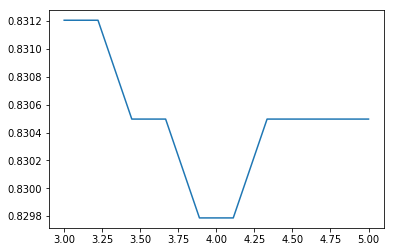

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(C_range,score);

### 追求平衡

In [178]:
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)
recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C
                ,class_weight = "balanced").fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" %(C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under C 0.010000, testing accuracy is 0.782979,recall is 0.745283', auc is 0.855853
00:01:012058
under C 1.062105, testing accuracy is 0.790071,recall is 0.761006', auc is 0.856100
00:06:062347
under C 2.114211, testing accuracy is 0.790071,recall is 0.761006', auc is 0.856069
00:09:481542
under C 3.166316, testing accuracy is 0.790780,recall is 0.764151', auc is 0.855985
00:13:168753
under C 4.218421, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855977
00:16:791960
under C 5.270526, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855994
00:20:710185
under C 6.322632, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855956
00:26:649524
under C 7.374737, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855861
00:26:697527
under C 8.426842, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855841
00:28:865651
under C 9.478947, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855804
00:34:118952
under C 10.531053, testing acc

0.8561003985532287 1.0621052631578947


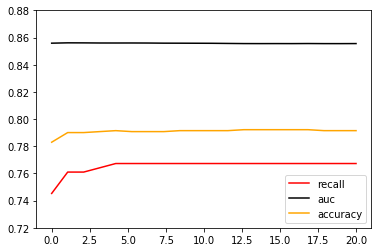

In [179]:
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend(loc=4)
plt.ylim([0.72,0.88])
plt.show()

In [180]:
times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947
            ,class_weight = "balanced"
            ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.790071,recall is 0.761006', auc is 0.856100
00:05:647323


### 调整ROC曲线阈值

In [182]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt
FPR, Recall, thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)
area = roc_auc_score(Ytest,clf.decision_function(Xtest))

In [183]:
FPR

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.15750916e-04,
       9.15750916e-04, 2.74725275e-03, 2.74725275e-03, 3.66300366e-03,
       3.66300366e-03, 4.57875458e-03, 4.57875458e-03, 5.49450549e-03,
       5.49450549e-03, 6.41025641e-03, 6.41025641e-03, 7.32600733e-03,
       7.32600733e-03, 8.24175824e-03, 8.24175824e-03, 9.15750916e-03,
       9.15750916e-03, 1.00732601e-02, 1.00732601e-02, 1.09890110e-02,
       1.09890110e-02, 1.28205128e-02, 1.28205128e-02, 1.55677656e-02,
       1.55677656e-02, 1.64835165e-02, 1.64835165e-02, 1.73992674e-02,
       1.73992674e-02, 2.28937729e-02, 2.28937729e-02, 2.38095238e-02,
       2.38095238e-02, 2.47252747e-02, 2.47252747e-02, 2.56410256e-02,
       2.56410256e-02, 2.83882784e-02, 2.83882784e-02, 3.02197802e-02,
       3.02197802e-02, 3.11355311e-02, 3.11355311e-02, 3.57142857e-02,
       3.57142857e-02, 4.02930403e-02, 4.02930403e-02, 4.12087912e-02,
       4.12087912e-02, 4.30402930e-02, 4.30402930e-02, 4.39560440e-02,
      

In [184]:
Recall

array([0.        , 0.00314465, 0.00628931, 0.00628931, 0.00943396,
       0.00943396, 0.02830189, 0.02830189, 0.09748428, 0.09748428,
       0.10691824, 0.10691824, 0.12578616, 0.12578616, 0.12893082,
       0.12893082, 0.16981132, 0.16981132, 0.21698113, 0.21698113,
       0.22012579, 0.22012579, 0.23899371, 0.23899371, 0.25157233,
       0.25157233, 0.26415094, 0.26415094, 0.2672956 , 0.2672956 ,
       0.29245283, 0.29245283, 0.29559748, 0.29559748, 0.29874214,
       0.29874214, 0.30503145, 0.30503145, 0.3081761 , 0.3081761 ,
       0.31446541, 0.31446541, 0.31761006, 0.31761006, 0.32704403,
       0.32704403, 0.33333333, 0.33333333, 0.33647799, 0.33647799,
       0.33962264, 0.33962264, 0.3427673 , 0.3427673 , 0.35534591,
       0.35534591, 0.37421384, 0.37421384, 0.3836478 , 0.3836478 ,
       0.38679245, 0.38679245, 0.38993711, 0.38993711, 0.39308176,
       0.39308176, 0.39937107, 0.39937107, 0.42138365, 0.42138365,
       0.42767296, 0.42767296, 0.43081761, 0.43081761, 0.44339

In [185]:
thresholds

array([ 5.57233605e+00,  4.57233605e+00,  4.04650060e+00,  3.63913754e+00,
        3.39319318e+00,  3.32729544e+00,  3.11502289e+00,  3.06809410e+00,
        2.64464478e+00,  2.64109353e+00,  2.58738418e+00,  2.58090894e+00,
        2.42453208e+00,  2.37842430e+00,  2.35794152e+00,  2.34643550e+00,
        2.14745283e+00,  2.14585082e+00,  2.03330992e+00,  2.03230824e+00,
        2.01836655e+00,  2.01015297e+00,  1.89605002e+00,  1.89412609e+00,
        1.85845379e+00,  1.84132949e+00,  1.75718014e+00,  1.73651047e+00,
        1.71568434e+00,  1.71447873e+00,  1.67512218e+00,  1.67421032e+00,
        1.66104289e+00,  1.62686090e+00,  1.61975325e+00,  1.60108755e+00,
        1.58221395e+00,  1.57483978e+00,  1.57390617e+00,  1.56571281e+00,
        1.54474156e+00,  1.51906080e+00,  1.51034887e+00,  1.48349896e+00,
        1.44324899e+00,  1.44249028e+00,  1.43927862e+00,  1.37472452e+00,
        1.36801862e+00,  1.33522587e+00,  1.33390155e+00,  1.32673896e+00,
        1.31092583e+00,  

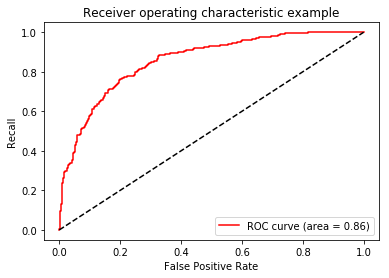

In [186]:
plt.figure()
plt.plot(FPR, Recall, color='red',
            label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [190]:
(Recall - FPR).tolist().index(max(Recall - FPR))

202

In [191]:
#寻找最佳阈值
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))

In [192]:
thresholds[maxindex]

-0.011916119080159437

In [193]:
from sklearn.metrics import accuracy_score as AC
times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947
            ,class_weight = "balanced"
            ).fit(Xtrain, Ytrain)

In [194]:
prob = pd.DataFrame(clf.decision_function(Xtest))

In [195]:
prob

,0
0,-0.729803
1,-2.079846
2,-1.952754
3,-1.753848
4,-0.445374
5,1.413816
6,-1.364294
7,0.460393
8,-1.158893
9,-0.565113


In [196]:
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0

In [197]:
prob

,0,y_pred
0,-0.729803,0.0
1,-2.079846,0.0
2,-1.952754,0.0
3,-1.753848,0.0
4,-0.445374,0.0
5,1.413816,1.0
6,-1.364294,0.0
7,0.460393,1.0
8,-1.158893,0.0
9,-0.565113,0.0


In [198]:
#检查模型本身的准确度
score = AC(Ytest,prob.loc[:,"y_pred"].values)
score

0.7886524822695036

In [199]:
recall = recall_score(Ytest, prob.loc[:,"y_pred"])
recall

0.7672955974842768

In [200]:
times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947
        ,class_weight = "balanced"
        ).fit(Xtrain, Ytrain)
prob = pd.DataFrame(clf.decision_function(Xtest))
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0
#检查模型本身的准确度
score = AC(Ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(Ytest, prob.loc[:,"y_pred"])
print("testing accuracy %f,recall is %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.788652,recall is 0.767296
00:05:722327
